<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png"
         width="500" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>
            Chair of Soil Mechanics and Foundation Engineering<br>
            Geotechnical Institute<br>
            Technische Universität Bergakademie Freiberg.
        </p>
        <p>
            <a href="https://tu-freiberg.de/en/soilmechanics">
                https://tu-freiberg.de/en/soilmechanics
            </a>
        </p>
    </div>
</div>

<div style="display: flex; align-items: center;">
    <p style="margin-top: 1em;">
        To activate the <strong>interactive features</strong> when in nbviewer mode, click on &quot;Execute on Binder&quot;
        <img src="https://mybinder.org/static/favicon.ico"
             alt="Binder"
             style="height: 1.1em; vertical-align: middle; margin: 0 6px;">
        on the top right. Then, click on Run → Run All Cells.
    </p>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_functions.plot_settings
sns.set_palette("tab10")

## Fundamental relationships

Harmonic loading by strain 

$$
    \epsilon = \hat{\epsilon} \sin (\omega t)
$$

leads to a phase-shifted stress response:

$$
    \sigma = \hat{\sigma} \sin (\omega t + \delta)
$$

In [2]:
t = np.linspace(0,10,1000)
f = 0.25
w = 2.*np.pi*f

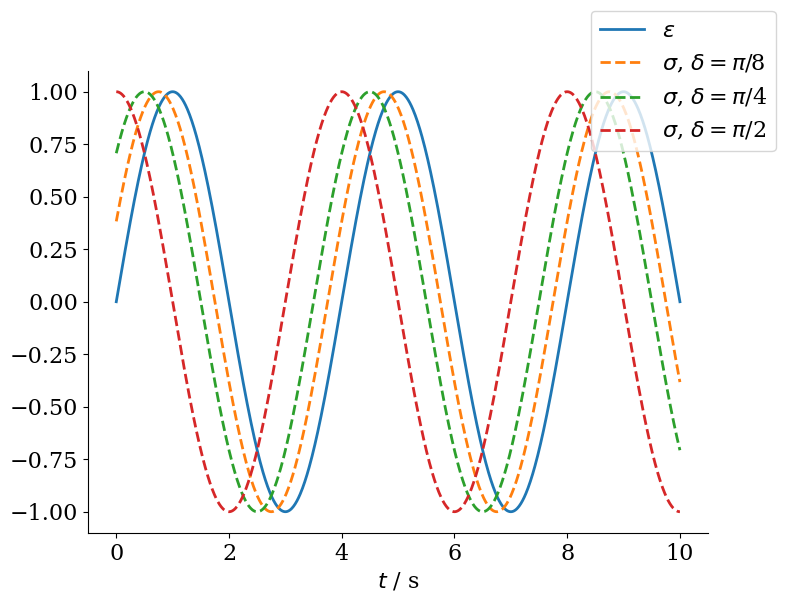

In [3]:
deltas = [8,4,2]
fig, ax = plt.subplots()
ax.plot(t,np.sin(w*t),label=r'$\epsilon$')
for delta in deltas:
    ax.plot(t,np.sin(w*t + np.pi/delta),label=r'$\sigma$, $\delta = \pi$/%i' %delta,ls='--')
ax.set_xlabel(r'$t$ / s')
fig.legend();

Using trigonometric theorems we find that the stress decomposes into two parts, one in phase (spring), the other 90° out of phase (dashpot)

$$
    \sigma = \hat{\sigma} \sin (\omega t) \cos \delta + \hat{\sigma} \cos (\omega t) \sin \delta
$$

Two moduli can be defined and measured from the amplitude ratio and the phase-shift between stress and strain signals

\begin{align*}
    E' &= \frac{\hat{\sigma}}{\hat{\epsilon}} \cos \delta
    \\
    E'' &= \frac{\hat{\sigma}}{\hat{\epsilon}} \sin \delta
\end{align*}

so that 

$$
    \sigma = E' \hat{\epsilon} \sin (\omega t) + E'' \hat{\epsilon} \cos (\omega t)
$$

When integrating the work done over one cycle

$$
    \int \limits_{0}^{2\pi} \sigma \text{d}\epsilon = \int \limits_{0}^{2\pi} \left[ E' \hat{\epsilon} \sin (\omega t) + E'' \hat{\epsilon} \cos (\omega t) \right]  \hat{\epsilon}  \cos(\omega t) \text{d}(\omega t) = E'' \hat{\epsilon}^2 \pi
$$

we observe that the contribution associated with $E'$ is fully reversible (storage modulus) and the one associated with $E''$ is dissipated (loss modulus). The same result could have been achieved by departing from $\epsilon = \hat{\epsilon}\cos(\omega t)$. Then, $\sigma = \hat{\sigma} \cos (\omega t + \delta) = \hat{\sigma} \cos (\omega t) \cos \delta - \hat{\sigma} \sin(\omega t)\sin\delta$, so that again the second part is 90° out of phase. We'd then find:

\begin{align*}
    \sigma &= E' \hat{\epsilon} \cos (\omega t) - E'' \hat{\epsilon} \sin (\omega t)
    \\
    \int \limits_{0}^{2\pi} \sigma \text{d}\epsilon &= \int \limits_{0}^{2\pi} \left[ E' \hat{\epsilon} \cos (\omega t) - E'' \hat{\epsilon} \sin (\omega t) \right]  \hat{\epsilon}  [-\sin(\omega t)] \text{d}(\omega t) = E'' \hat{\epsilon}^2 \pi
\end{align*}

The latter fact is beneficial for making use of the complex plane (Euler's formula):

$$
    e^{i \varphi} = \cos \varphi + i \sin \varphi
$$

where the real part describes the in-phase component, and the imaginary part the out-of-phase component. A complex modulus can then be expressed as

$$
    E^* = E' + i E''
$$

This allows a compact representation. Consider a load mathematically given by $\epsilon = \hat{\epsilon}^{i\omega t}$, where $\text{Re}(\epsilon) = \hat{\epsilon}\cos(\omega t)$ is the real physical loading of the system. Then, with

\begin{align*}
    \sigma &= E^* \epsilon = ( E' + i E'') \hat{\epsilon}e^{i\omega t}
    \\
    &= E' \hat{\epsilon} \cos (\omega t) + i E' \hat{\epsilon} \sin (\omega t) - E'' \hat{\epsilon} \sin (\omega t) + i E'' \hat{\epsilon} \cos (\omega t)
    \\
    \text{Re}(\sigma) &=  E' \hat{\epsilon} \cos (\omega t) - E'' \hat{\epsilon} \sin (\omega t)
\end{align*}

the known result is recovered.

Yet another way of looking at things departs from defining $\hat{E} = \hat{\sigma}/\hat{\epsilon}$, so that

$$
    E^* = E' + i E'' = \hat{E} \cos \delta + i \hat{E} \sin \delta  = \hat{E}e^{i\delta}
$$

Now the compactness of the notation really becomes obvious:

\begin{align*}
    \sigma &= E^* \epsilon = \hat{E} \hat{\epsilon} e^{i\delta} e^{i\omega t}
    \\
    &= \hat{\sigma} e^{i(\omega t + \delta)}
    \\
    \text{Re}(\sigma) &=  \hat{\sigma} \cos (\omega t + \delta)
\end{align*}

## Preliminaries: viscoelastic torsion oscillator

The twist $\vartheta$ causes a radially increasing shear strain $\gamma$ in a cylindrical specimen of height $h$

$$
    \gamma = \vartheta \frac{r}{h}
$$

The torque $M_\text{T}$ similarly causes a radially increasing shear stress $\tau$

$$
    \tau = M_\text{T} \frac{r}{I_\text{T}}
$$

with the tortional second moment of area of a circular cross-section

$$
    I_\text{T} = \frac{\pi}{2} r^4
$$

Now consider we provide a harmonic angular rotation with angular frequency $\omega$

$$
    \vartheta = \hat{\vartheta} e^{i \omega t}
$$

and measure a resulting torque with a phase shift $\delta$

$$
    M_\text{T} = \hat{M}_\text{T} e^{i (\omega t + \delta)}
$$

We also find

$$
    \dot{\vartheta} = i \omega \hat{\vartheta} e^{i \omega t}
$$

Let's plot a few things to see what this means....

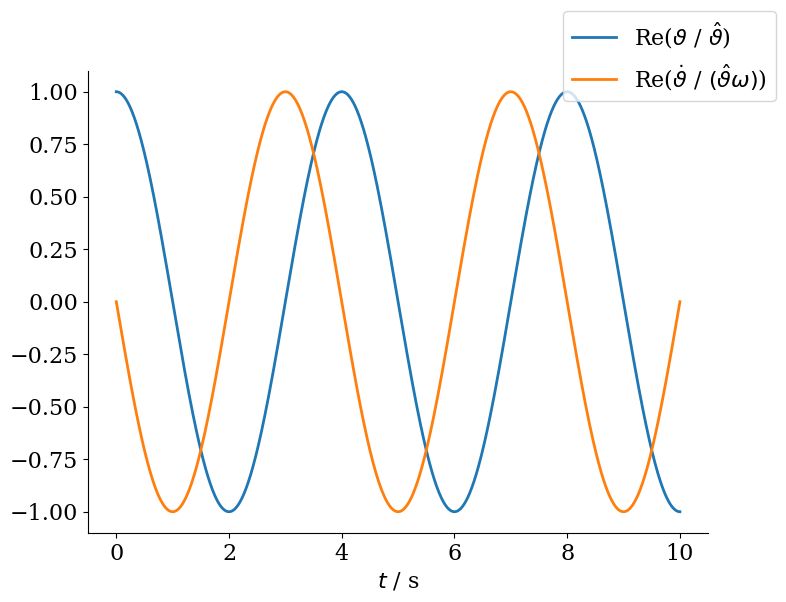

In [4]:
fig, ax = plt.subplots()
ax.plot(t,np.cos(w*t),label=r'Re($\vartheta$ / $\hat{\vartheta}$)')
ax.plot(t,-np.sin(w*t),label=r'Re($\dot{\vartheta}$ / $(\hat{\vartheta} \omega)$)')
ax.set_xlabel(r'$t$ / s')
fig.legend();

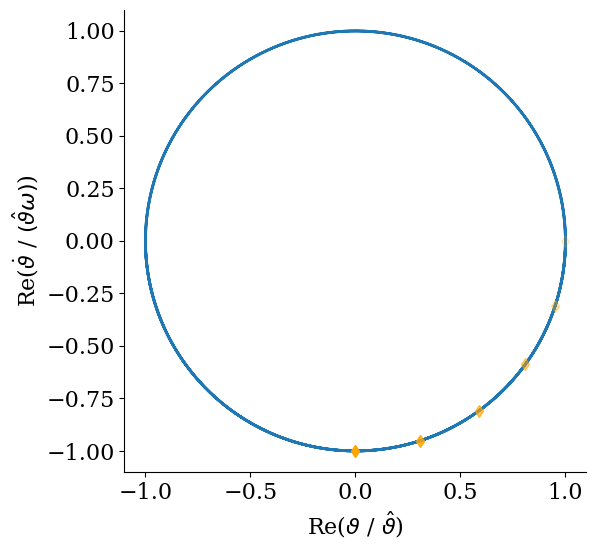

In [5]:
fig, ax = plt.subplots()
ax.plot(np.cos(w*t),-np.sin(w*t))
for i in range(6):
    ax.plot(np.cos(np.pi/2*i/5),-np.sin(np.pi/2*i/5),marker='d',alpha=(i+1)/6,color='orange')
ax.set_xlabel(r'Re($\vartheta$ / $\hat{\vartheta}$)')
ax.set_ylabel(r'Re($\dot{\vartheta}$ / $(\hat{\vartheta} \omega)$)')
ax.set_aspect('equal');

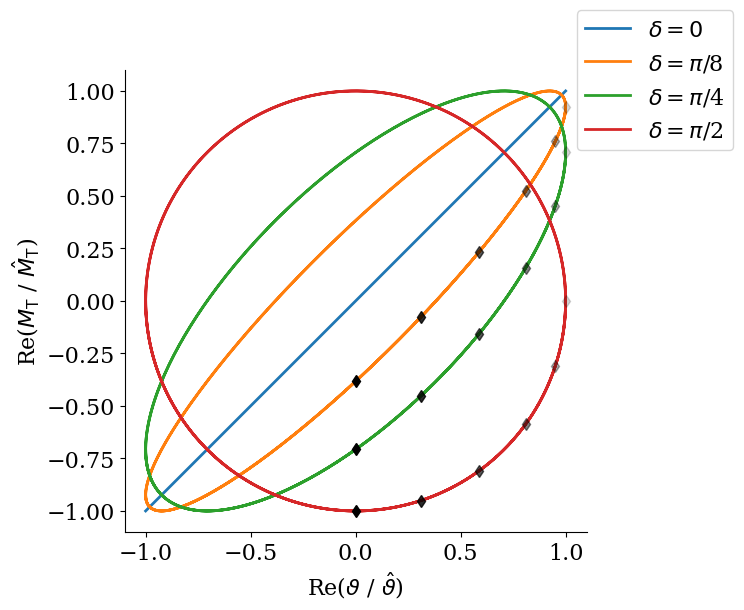

In [6]:
deltas = [8,4,2]
fig, ax = plt.subplots()
ax.plot(np.cos(w*t ),np.cos(w*t), label = r'$\delta = 0$')
for delta in deltas:
    ax.plot(np.cos(w*t),np.cos(w*t + np.pi/delta), label = r'$\delta = \pi$/%i' %delta)
    for i in range(6):
        ax.plot(np.cos(np.pi/2*i/5),np.cos(np.pi/2*i/5+np.pi/delta),marker='d',alpha=(i+1)/6,color='black')
ax.set_xlabel(r'Re($\vartheta$ / $\hat{\vartheta}$)')
ax.set_ylabel(r'Re($M_\mathrm{T}$ / $\hat{M}_\mathrm{T}$)')
ax.set_aspect('equal')
fig.legend();

A complex shear modulus can then be determined by

\begin{align*}
    G^* &= \tau \gamma^{-1} = \frac{\hat{M}_\text{T}r}{I_\text{T}} e^{i(\omega t + \delta)} \ \frac{h}{r\hat{\vartheta}} e^{-i(\omega t)}
    \\
    &= \frac{h}{I_\text{T}} \frac{\hat{M}_\text{T}}{\hat{\vartheta}} e^{i \delta}
\end{align*}

which contains a geometrical factor, an amplitude factor, and the phase shift.

Thus,

\begin{align*}
    G' &= \text{Re}(G^*) = \frac{h}{I_\text{T}} \frac{\hat{M}_\text{T}}{\hat{\vartheta}} \cos \delta = \frac{\hat{\tau}}{\hat{\gamma}} \cos \delta
    \\
    G'' &= \text{Im}(G^*) = \frac{h}{I_\text{T}} \frac{\hat{M}_\text{T}}{\hat{\vartheta}} \sin \delta = \frac{\hat{\tau}}{\hat{\gamma}} \sin \delta
\end{align*}

## Interpretation using Kelvin element

\begin{align*}
    \tau &= G \gamma + \eta \dot\gamma
    \\
    &= \frac{r}{h} \left[ G + i \omega \eta \right]  \hat{\vartheta} e^{i \omega t}
    \\
    &=  \frac{r}{I_\text{T}} \hat{M}_\text{T} e^{i (\omega t + \delta)}
\end{align*}

Rearranging ...

$$
 \underbrace{[G + i \omega \eta]}_{G^*} \underbrace{\hat{\vartheta} e^{i \omega t}}_{\vartheta} = \frac{\hat{M}_\text{T} h}{I_\text{T}} e^{i (\omega t + \delta)}
$$

... and again ....

$$
 G^* = G + i \omega \eta = \frac{\hat{M}_\text{T} h}{I_\text{T} \hat{\vartheta}} e^{i \delta}
$$

so that:

\begin{align*}
    G' &= \text{Re}(G^*) = \frac{h}{I_\text{T}} \frac{\hat{M}_\text{T}}{\hat{\vartheta}} \cos \delta = \frac{\hat{\tau}}{\hat{\gamma}} \cos \delta = G
    \\
    G'' &= \text{Im}(G^*) = \frac{h}{I_\text{T}} \frac{\hat{M}_\text{T}}{\hat{\vartheta}} \sin \delta = \frac{\hat{\tau}}{\hat{\gamma}} \sin \delta = \omega \eta
\end{align*}

The phase shift is given by

$$
    \delta = \arctan \frac{G''}{G'} = \arctan \frac{\omega \eta}{G}
$$

The real part of the shear stress follows as

$$
    \text{Re}(\tau) = \frac{h}{I_\text{T}} \hat{M}_\text{T} \cos (\omega t + \delta) = \frac{r}{h} \hat{\vartheta}\left[ G \cos (\omega t ) - \omega \eta \sin  (\omega t) \right] = \hat{\gamma}\left[ G \cos (\omega t ) - \omega \eta \sin  (\omega t) \right]
$$

The frequency scaling becomes very apparent.

## Interpretation using standard linear solid

\begin{align*}
    \tau &= \tau_1 + \tau_2
    \\
    \tau_1 &= G_1 \gamma
    \\
    \tau_2 &= G_2 (\gamma - \gamma_\text{ov}) = \eta \dot{\gamma}_\text{ov}
    \\
    \dot{\tau} &= G_1 \dot{\gamma} + G_2 \left[ \dot{\gamma} - \frac{\tau - G_1 \gamma}{\eta} \right]
    \\
    \dot{\tau} + \frac{G_2}{\eta} \tau &= (G_1 + G_2)\dot{\gamma} + \frac{G_2 G_1}{\eta} \gamma
\end{align*}

TODO: add derivation (substitute complex harmonics, separate Re and Im)

Ansatz: $\gamma = \hat{\gamma} e^{i\omega t}$, $\tau = \hat{\tau}e^{i\delta}e^{i\omega t}$

Substitution into SLS: 

\begin{align}
    \hat{\tau}e^{i\delta}e^{i\omega t} \left[ i\omega + \frac{G_2}{\eta} \right] &= \hat{\gamma}e^{i\omega t} \left[ (G_1 + G_2) i\omega + \frac{G_1G_2}{\eta} \right]
    \\
    \tau \gamma^{-1} &= \left[ (G_1 + G_2) i\omega + \frac{G_1G_2}{\eta} \right]  \left[ i\omega + \frac{G_2}{\eta} \right]^{-1}
    \\
    &= \left[ (G_1 + G_2) i\omega + \frac{G_1G_2}{\eta} \right]  \left[ i\omega + \frac{G_2}{\eta} \right]^{-1} \frac{\left[ - i\omega + \frac{G_2}{\eta} \right]}{\left[ - i\omega + \frac{G_2}{\eta} \right]}
    \\
    &= \left[ (G_1 + G_2) i\omega + \frac{G_1G_2}{\eta} \right]  \frac{\left[ - i\omega + \frac{G_2}{\eta} \right]}{\left[ \omega^2 + \left(\frac{G_2}{\eta}\right)^2 \right]}
    \\
    &= \left[ (G_1 + G_2) i + \frac{G_1G_2}{\omega\eta} \right]  \frac{\left[ - i + \frac{G_2}{\omega\eta} \right]}{\left[ 1 + \left(\frac{G_2}{\omega\eta}\right)^2 \right]}
\end{align}

Separation for imaginary and real parts yields the result:


\begin{align*}
    G' &= G_1 + \frac{G_2}{\left( \frac{G_2}{\omega \eta} \right)^2 + 1} = G_1 + \frac{G_2 \left( \frac{\omega \eta}{G_2} \right)^2}{\left( \frac{\omega \eta}{G_2} \right)^2 + 1}
    \\
    G'' &= \frac{G_2 \left( \frac{G_2}{\omega \eta} \right)}{\left( \frac{G_2}{\omega \eta} \right)^2 + 1} = \frac{G_2 \left( \frac{\omega \eta}{G_2} \right)}{\left( \frac{\omega \eta}{G_2} \right)^2 + 1}
\end{align*}

Non-dimensionalizing ...

\begin{align*}
    \frac{G'}{G_2} &= \frac{G_1}{G_2} + \frac{\left( \frac{\omega \eta}{G_2} \right)^2}{\left( \frac{\omega \eta}{G_2} \right)^2 + 1}
    \\
    \frac{G''}{G_2} &= \frac{\left( \frac{\omega \eta}{G_2} \right)}{\left( \frac{\omega \eta}{G_2} \right)^2 + 1}
\end{align*}

In [7]:
storage_modulus = lambda g1g2, twopietag2, f: g1g2+(twopietag2*f)**2/((twopietag2*f)**2+1)
loss_modulus = lambda g1g2, twopietag2, f: (twopietag2*f)/((twopietag2*f)**2+1)

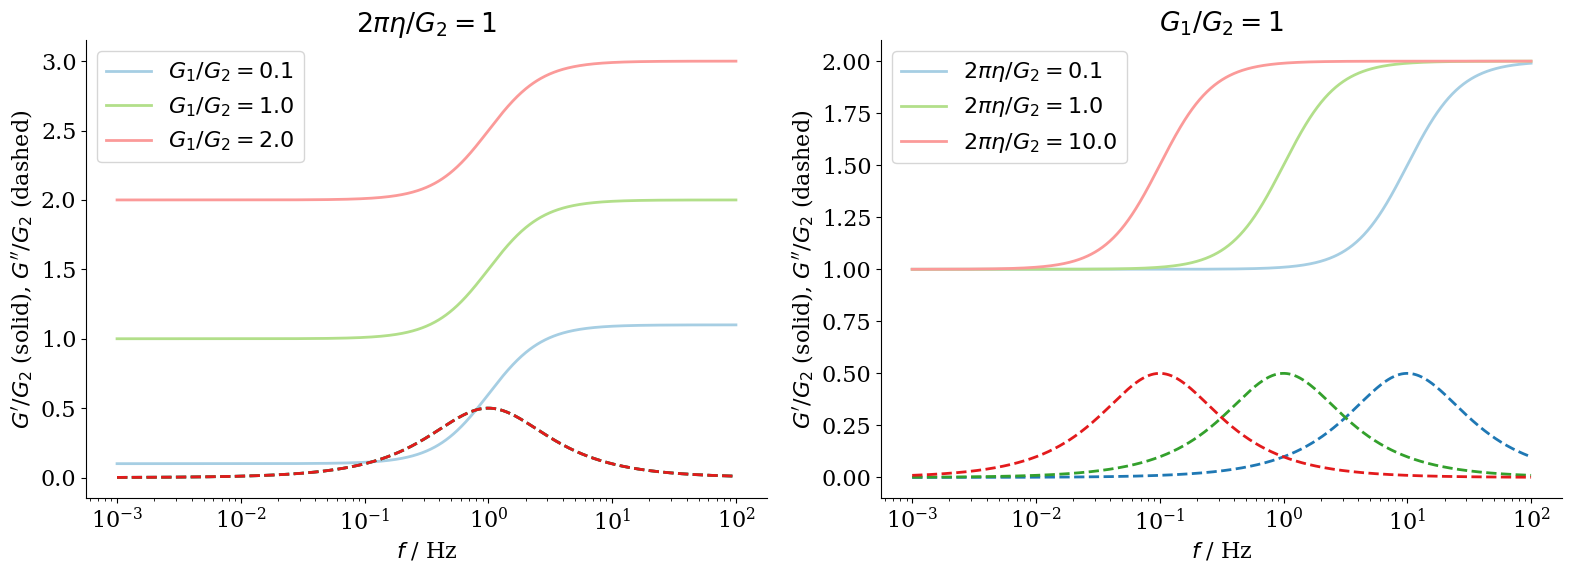

In [8]:
f = np.logspace(-3,2,1000)
stiffness_ratio = [0.1,1,2]
viscosity_ratio = [0.1,1,10]

sns.set_palette("Paired")
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
for sr in stiffness_ratio:
    ax[0].plot(f,storage_modulus(sr,1,f),label=r'$G_1/G_2 = %.1f$' % sr)
    ax[0].plot(f,loss_modulus(sr,1,f),ls='--')
    
for vr in viscosity_ratio:
    ax[1].plot(f,storage_modulus(1,vr,f),label=r'$2\pi\eta/G_2 = %.1f$' % vr)
    ax[1].plot(f,loss_modulus(1,vr,f),ls='--')

for i in range(2):
    ax[i].legend()
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$f$ / Hz')
    ax[i].set_ylabel(r"$G'/G_2$ (solid), $G''/G_2$ (dashed)")

ax[0].set_title(r'$2\pi\eta/G_2 = 1$')
ax[1].set_title(r'$G_1/G_2 = 1$')
fig.tight_layout();

$\eta$ controls critical frequency where loss modulus is maximal and where storage modulus has its transition. For storage, $G_1$ controls low-rate stiffness, $G_1+G_2$ high-rate stiffness. The following graph shows how the phase-shift is affected.

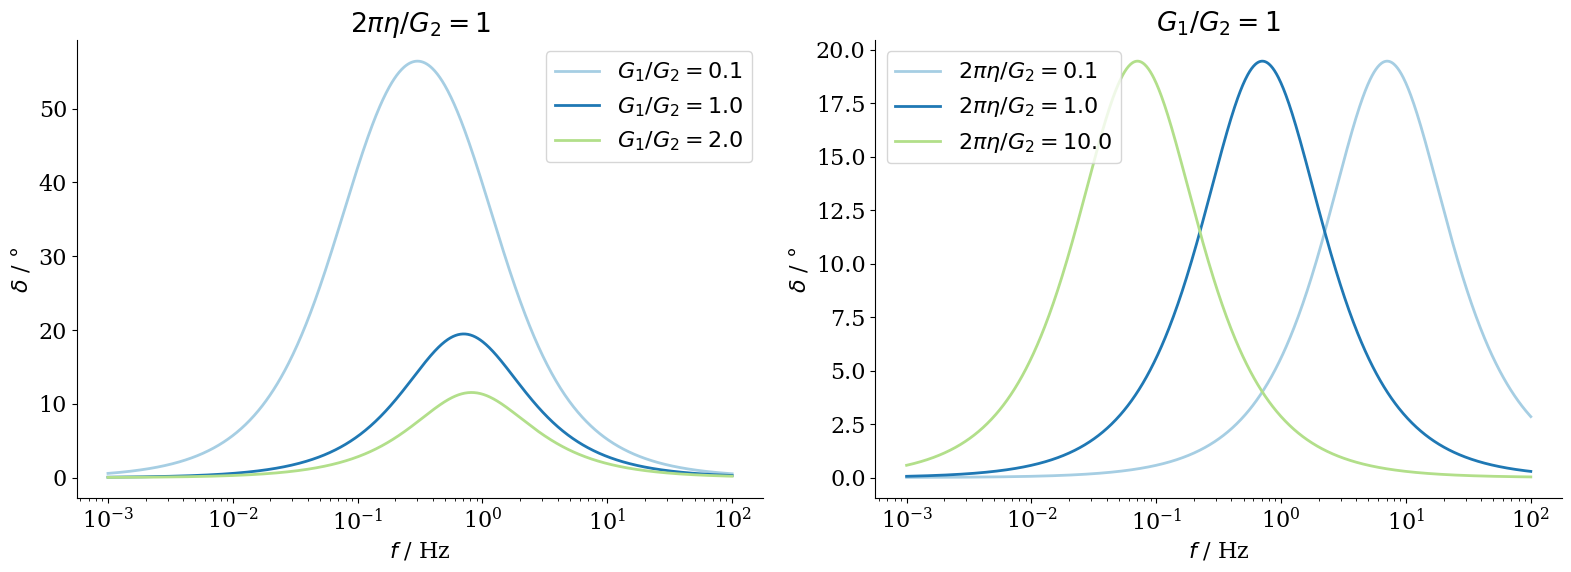

In [9]:
f = np.logspace(-3,2,1000)
stiffness_ratio = [0.1,1,2]
viscosity_ratio = [0.1,1,10]

sns.set_palette("Paired")
fig, ax = plt.subplots(ncols=2,figsize=(16,6))
for sr in stiffness_ratio:
    ax[0].plot(f,np.rad2deg(np.arctan(loss_modulus(sr,1,f)/storage_modulus(sr,1,f))),label=r'$G_1/G_2 = %.1f$' % sr)
    
for vr in viscosity_ratio:
    ax[1].plot(f,np.rad2deg(np.arctan(loss_modulus(1,vr,f)/storage_modulus(1,vr,f))),label=r'$2\pi\eta/G_2 = %.1f$' % vr)

for i in range(2):
    ax[i].legend()
    ax[i].set_xscale('log')
    ax[i].set_xlabel(r'$f$ / Hz')
    ax[i].set_ylabel(r"$\delta$ / ° ")

ax[0].set_title(r'$2\pi\eta/G_2 = 1$')
ax[1].set_title(r'$G_1/G_2 = 1$')
fig.tight_layout();

## Interpretation using viscoelastic series expansion

To include non-linear viscoelasticity by simple summation ... we will get a set of discrete transition frequencies with the associated loss increases, stiffness increases, etc.

to be continued ...